# **Load and Explore the Customer Churn Dataset**

In [8]:
# STEP 1: IMPORT NECESSARY LIBRARIES
# I'm importing standard libraries for data analysis and visual inspection.
import pandas as pd
import numpy as np

# STEP 2: LOAD THE DATASET
# I’ll load the customer churn data to begin my exploration and clean-up process.
df = pd.read_csv("customer_churn_data.csv")

# Quick look at the structure and first few rows
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
  CustomerID  Gender  Age Subscription_Type  Tenure_Months  Monthly_Spend  \
0  CUST00001    Male   22           Premium              3          42.30   
1  CUST00002  Female   64           Premium             54          10.23   
2  CUST00003    Male   40             Basic             45          13.36   
3  CUST00004    Male   66           Premium             40          43.32   
4  CUST00005    Male   26           Premium              7          17.67   

   Support_Tickets Payment_Method Auto_Renew  Total_Spend  Churn  
0                1           Card        Yes       126.90      0  
1                1         Wallet         No       552.42      0  
2                2         Wallet         No       601.20      1  
3                1  Bank Transfer        Yes      1732.80      0  
4                0  Bank Transfer        Yes       123.69      0  


# **Basic Info and Null Checks**

In [9]:
# STEP 3: UNDERSTAND THE STRUCTURE
# I want to verify data types and look for any null or unexpected values.
print("\nData summary:")
print(df.info())

# STEP 4: CHECK FOR MISSING VALUES
# Missing values can cause model issues later. I’ll check if any columns need attention.
print("\nMissing values per column:")
print(df.isnull().sum())



Data summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         2200 non-null   object 
 1   Gender             2200 non-null   object 
 2   Age                2200 non-null   int64  
 3   Subscription_Type  2200 non-null   object 
 4   Tenure_Months      2200 non-null   int64  
 5   Monthly_Spend      2200 non-null   float64
 6   Support_Tickets    2200 non-null   int64  
 7   Payment_Method     2200 non-null   object 
 8   Auto_Renew         2200 non-null   object 
 9   Total_Spend        2200 non-null   float64
 10  Churn              2200 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 189.2+ KB
None

Missing values per column:
CustomerID           0
Gender               0
Age                  0
Subscription_Type    0
Tenure_Months        0
Monthly_Spend        0
Support_Tickets    

# **Basic Descriptive Statistics**

In [10]:
# STEP 5: STATISTICAL SUMMARY
# I’m getting a feel for the spread of numeric columns – especially Age, Tenure, Spend, and Support Tickets.
print("\nStatistical summary of numeric features:")
print(df.describe())



Statistical summary of numeric features:
               Age  Tenure_Months  Monthly_Spend  Support_Tickets  \
count  2200.000000    2200.000000    2200.000000      2200.000000   
mean     43.517273      29.983636      24.532209         1.480455   
std      14.908991      17.281625      10.233981         1.208421   
min      18.000000       1.000000     -10.820000         0.000000   
25%      31.000000      15.000000      17.730000         1.000000   
50%      43.000000      30.000000      24.640000         1.000000   
75%      56.000000      45.000000      31.282500         2.000000   
max      69.000000      59.000000      57.400000         7.000000   

       Total_Spend        Churn  
count  2200.000000  2200.000000  
mean    730.990036     0.224091  
std     543.302805     0.417077  
min    -384.540000     0.000000  
25%     296.010000     0.000000  
50%     630.150000     0.000000  
75%    1079.125000     0.000000  
max    3030.120000     1.000000  


# **Categorical Variable Exploration**

In [11]:
# STEP 6: UNDERSTAND CATEGORICAL DISTRIBUTIONS
# This helps me see class balance and category frequency – especially important for modeling.
print("\nSubscription Type Distribution:")
print(df['Subscription_Type'].value_counts())

print("\nAuto-Renew Distribution:")
print(df['Auto_Renew'].value_counts())

print("\nChurn Distribution (Target Variable):")
print(df['Churn'].value_counts())



Subscription Type Distribution:
Subscription_Type
Basic         1081
Premium        797
Enterprise     322
Name: count, dtype: int64

Auto-Renew Distribution:
Auto_Renew
Yes    1586
No      614
Name: count, dtype: int64

Churn Distribution (Target Variable):
Churn
0    1707
1     493
Name: count, dtype: int64


# Important Notes

- I begin every machine learning project with a comprehensive check of data structure and quality, as model success depends heavily on clean, well-understood inputs.

- I’m focused not just on code, but also on why the data behaves the way it does, and how each field might relate to churn.

- This foundational EDA helps guide which features are useful, what may need encoding, and how balanced our target variable is.

# **Data Preprocessing + Visual EDA**

In [4]:
# STEP 1: IMPORT LIBRARIES FOR VISUALIZATION AND MODEL PREP
# I’ll need seaborn and matplotlib for visual exploration, and sklearn for encoding/scaling later.
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Ensure plots appear inline
%matplotlib inline


# **Visualize Target Variable Balance**

C:\Users\USER\AppData\Local\Temp\ipykernel_124\3511542760.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


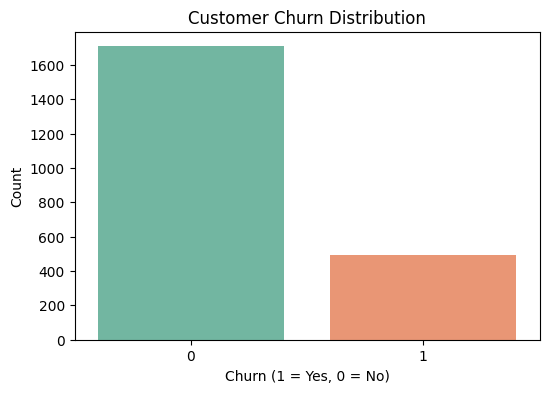

In [12]:
# Understanding the churn balance is critical — highly imbalanced data would require special treatment (e.g., resampling).
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title("Customer Churn Distribution")
plt.xlabel("Churn (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


# **Compare Churn by Categorical Features**

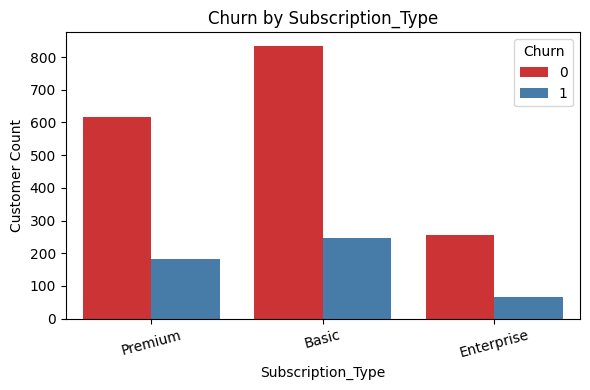

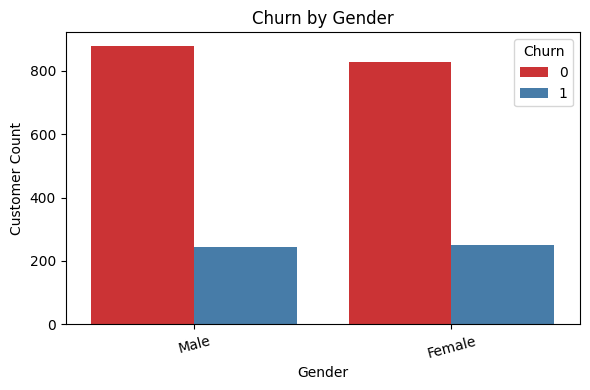

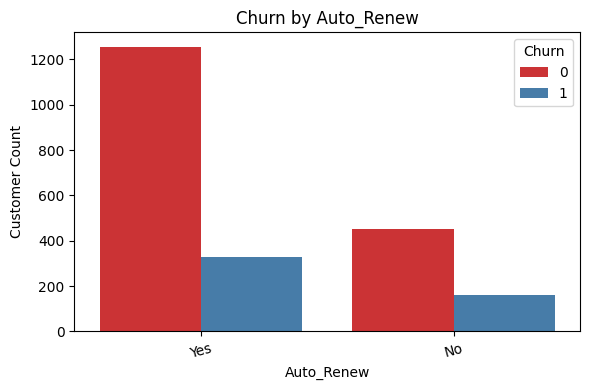

In [13]:
# I want to know how churn varies across subscription types, gender, and auto-renew behavior.
cat_features = ['Subscription_Type', 'Gender', 'Auto_Renew']

for feature in cat_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, hue='Churn', palette='Set1')
    plt.title(f"Churn by {feature}")
    plt.ylabel("Customer Count")
    plt.xlabel(feature)
    plt.legend(title="Churn", loc='upper right')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()


# **Compare Churn by Numeric Features**

C:\Users\USER\AppData\Local\Temp\ipykernel_124\1640923455.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=feature, palette='Set3')


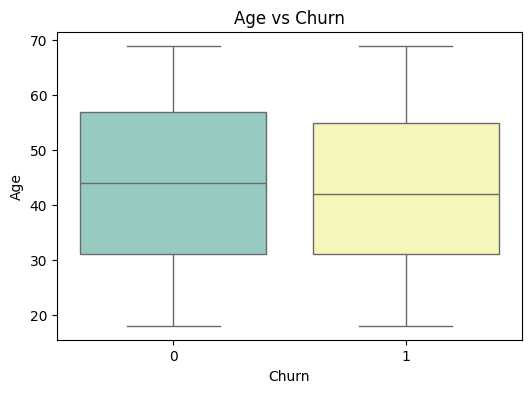

C:\Users\USER\AppData\Local\Temp\ipykernel_124\1640923455.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=feature, palette='Set3')


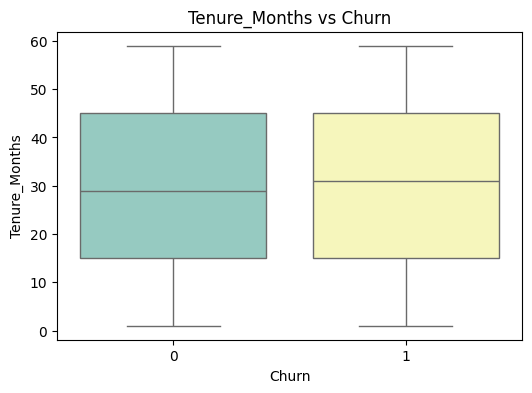

C:\Users\USER\AppData\Local\Temp\ipykernel_124\1640923455.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=feature, palette='Set3')


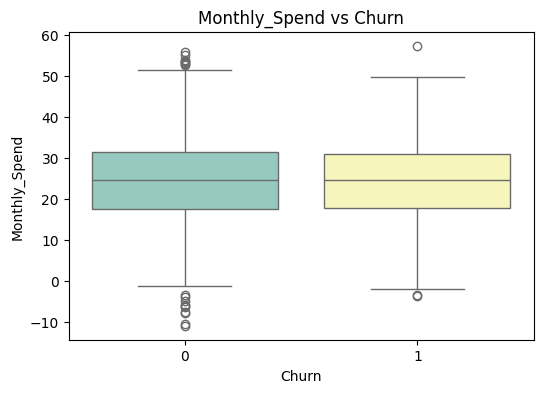

C:\Users\USER\AppData\Local\Temp\ipykernel_124\1640923455.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=feature, palette='Set3')


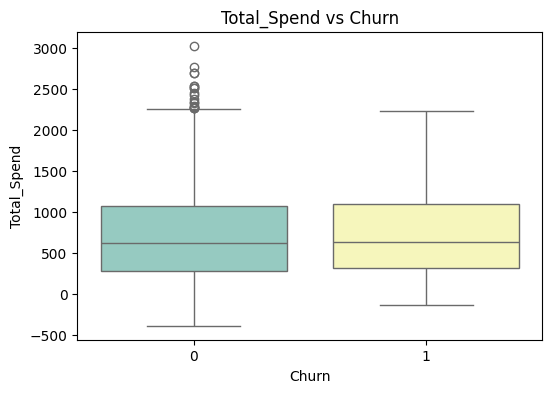

C:\Users\USER\AppData\Local\Temp\ipykernel_124\1640923455.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=feature, palette='Set3')


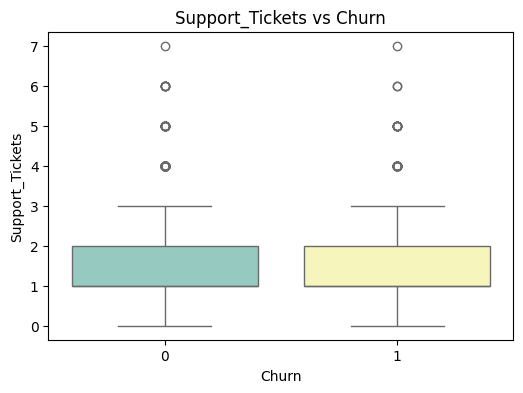

In [15]:
# Here, I’ll use boxplots to visualize how numeric distributions differ between churned and retained customers.
num_features = ['Age', 'Tenure_Months', 'Monthly_Spend', 'Total_Spend', 'Support_Tickets']

for feature in num_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Churn', y=feature, palette='Set3')
    plt.title(f"{feature} vs Churn")
    plt.show()


# **Encode Categorical Variables**

In [17]:
# Machine learning models require numeric input, so I’ll label-encode object columns here.
label_enc = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    if col != 'CustomerID':
        df[col] = label_enc.fit_transform(df[col])
print(df[col])

0       CUST00001
1       CUST00002
2       CUST00003
3       CUST00004
4       CUST00005
          ...    
2195    CUST02196
2196    CUST02197
2197    CUST02198
2198    CUST02199
2199    CUST02200
Name: CustomerID, Length: 2200, dtype: object


In [20]:
df_corr = df.drop(columns=['CustomerID'])

# **Correlation Matrix**

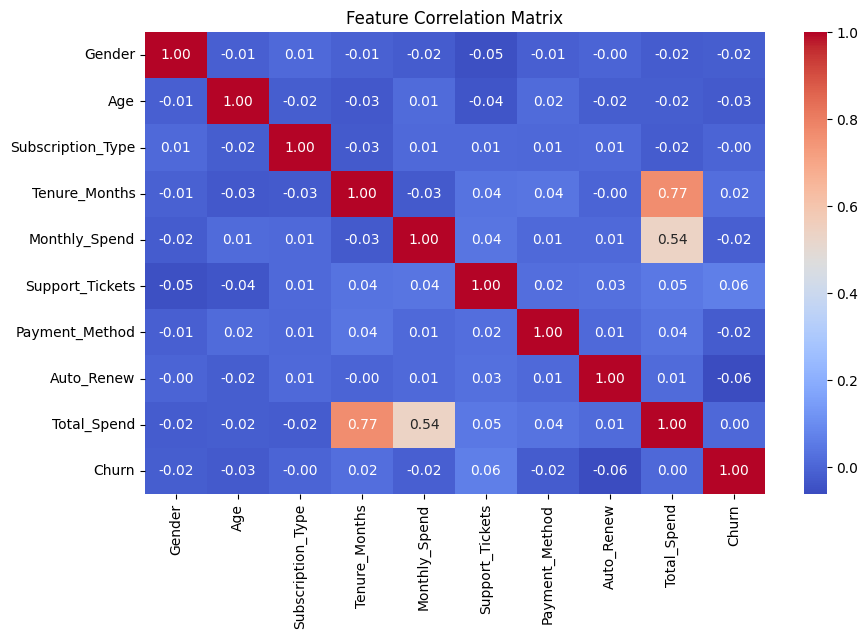

In [22]:
# Before modeling, I want to see how strongly features relate to churn and to each other.

# Drop non-numeric column before computing correlation
df_corr = df.drop(columns=['CustomerID'])

# generating heat map
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()


# **Model Building & Evaluation**

In [23]:
# STEP 1: IMPORT MODELING LIBRARIES
# I’m using logistic regression for interpretability, and random forest for stronger performance with feature importance.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Optional: warnings cleanup
import warnings
warnings.filterwarnings('ignore')


# Split Features and Target Variable

In [24]:
# I’ll now separate predictors (X) from the target (y = Churn).
X = df.drop(columns=['CustomerID', 'Churn'])  # Dropping ID for modeling
y = df['Churn']

# Split into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]} | Test samples: {X_test.shape[0]}")


Training samples: 1760 | Test samples: 440


# Train Logistic Regression (Baseline Model)

In [25]:
# Starting with Logistic Regression to set a baseline and provide interpretable coefficients.
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("\nLogistic Regression Evaluation:")
print(classification_report(y_test, y_pred_log))



Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87       341
           1       0.00      0.00      0.00        99

    accuracy                           0.78       440
   macro avg       0.39      0.50      0.44       440
weighted avg       0.60      0.78      0.68       440



# Train Random Forest (Better Performance + Feature Importance)

In [26]:
# Random Forest can handle feature interactions, rank importance, and usually performs better on non-linear data.
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Evaluation:")
print(classification_report(y_test, y_pred_rf))



Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.79      0.98      0.87       341
           1       0.57      0.08      0.14        99

    accuracy                           0.78       440
   macro avg       0.68      0.53      0.51       440
weighted avg       0.74      0.78      0.71       440



# Confusion Matrix Comparison

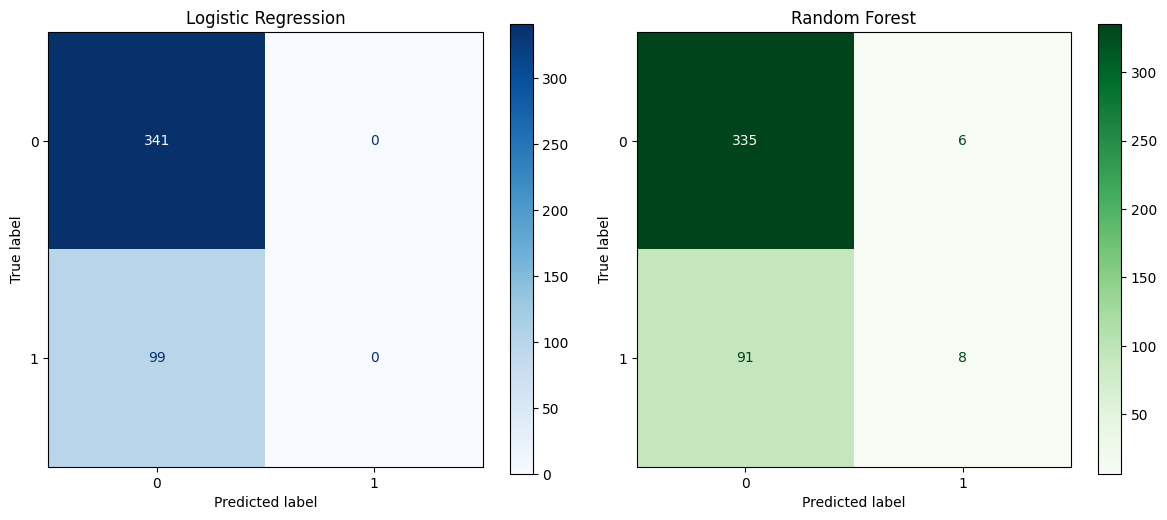

In [27]:
# This helps visualize true/false positives and negatives for both models.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, ax=axes[0], cmap="Blues")
axes[0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, ax=axes[1], cmap="Greens")
axes[1].set_title("Random Forest")

plt.tight_layout()
plt.show()


# Feature Importance (from Random Forest)

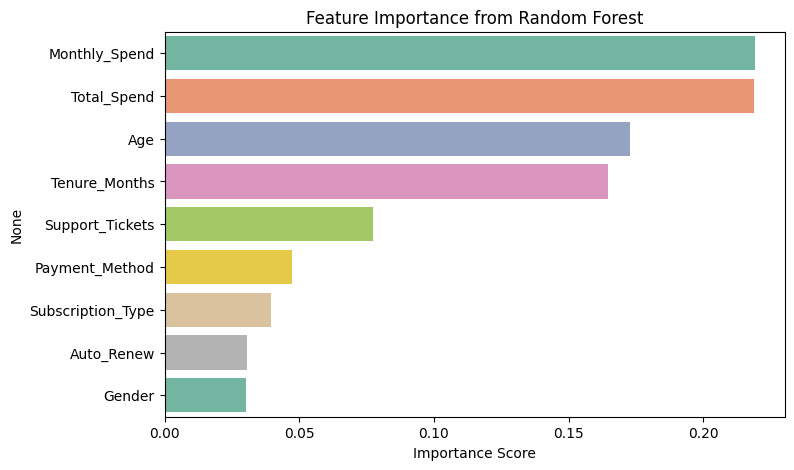

In [28]:
# Understanding which features drive churn is critical for business stakeholders.
import pandas as pd

importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=importance.values, y=importance.index, palette="Set2")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.show()
